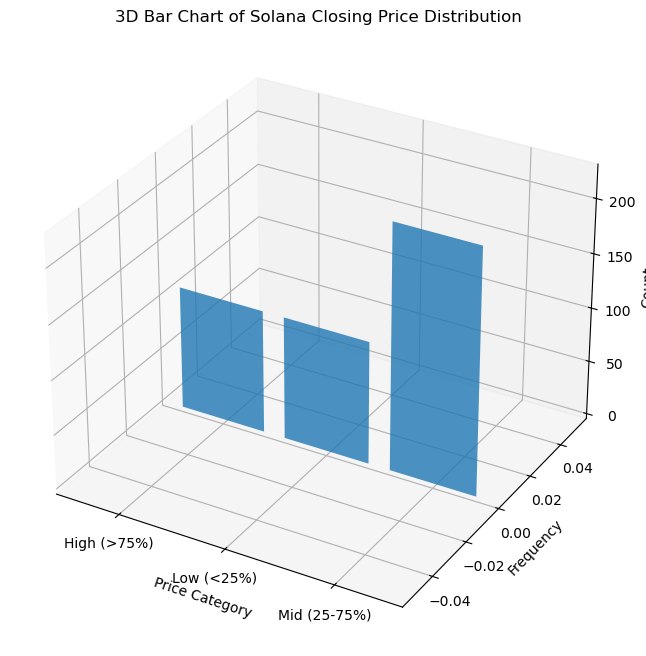

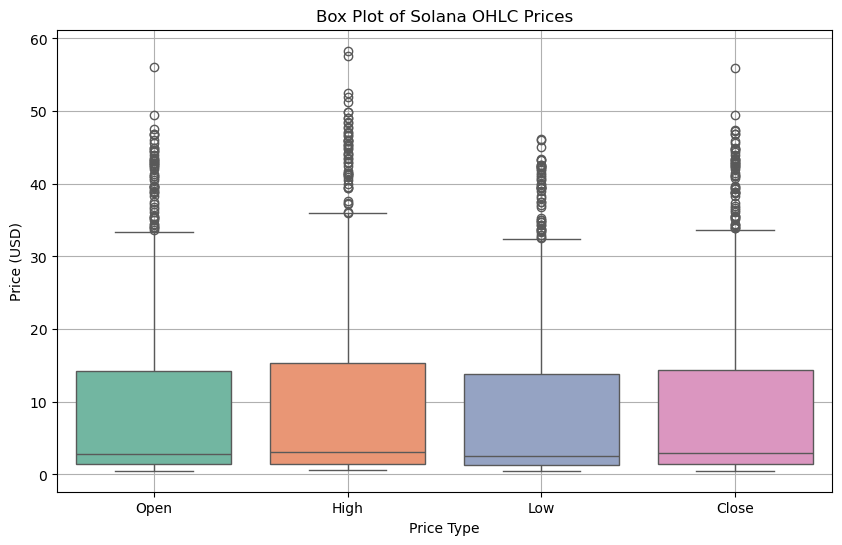

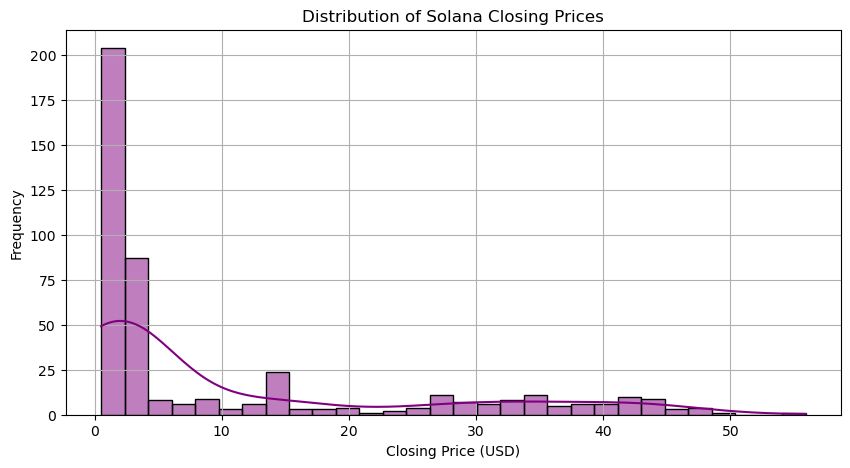

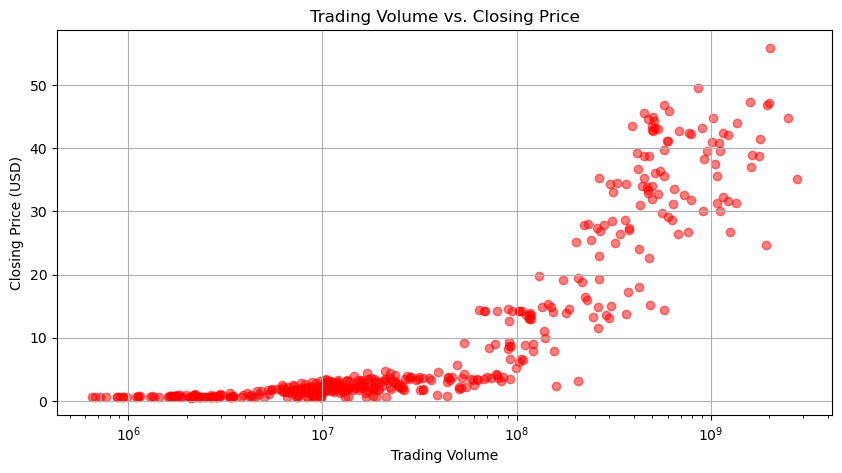

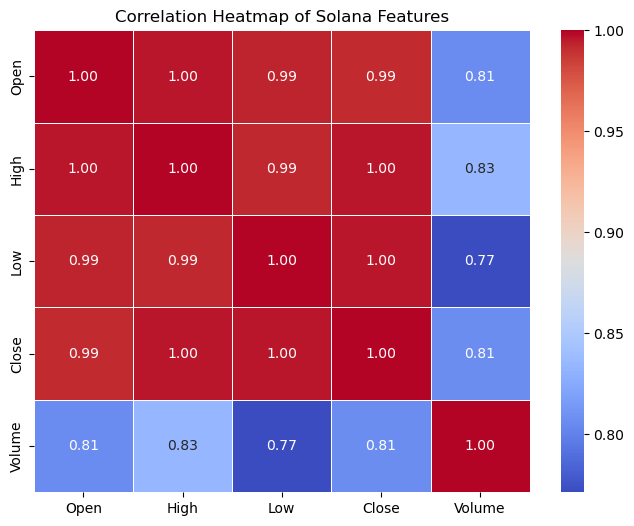

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = r"C:\Users\Lenovo\Downloads\coin_Solana.csv"

df = pd.read_csv(file_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sorting by Date
df = df.sort_values(by='Date')

# Visualization 1: 3D Bar Chart for Closing Price Distribution
closing_price_ranges = ["Low (<25%)", "Mid (25-75%)", "High (>75%)"]
percentiles = np.percentile(df['Close'], [25, 75])
labels = []
for price in df['Close']:
    if price < percentiles[0]:
        labels.append(closing_price_ranges[0])
    elif price > percentiles[1]:
        labels.append(closing_price_ranges[2])
    else:
        labels.append(closing_price_ranges[1])

unique_labels, counts = np.unique(labels, return_counts=True)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar(unique_labels, counts, zs=0, zdir='y', alpha=0.8)
ax.set_xlabel("Price Category")
ax.set_ylabel("Frequency")
ax.set_zlabel("Count")
ax.set_title("3D Bar Chart of Solana Closing Price Distribution")
plt.show()

# Visualization 2: Box Plot for OHLC Prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette="Set2")
plt.xlabel("Price Type")
plt.ylabel("Price (USD)")
plt.title("Box Plot of Solana OHLC Prices")
plt.grid()
plt.show()

# Visualization 3: Histogram of Closing Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='purple')
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Solana Closing Prices")
plt.grid()
plt.show()

# Visualization 4: Scatter Plot of Volume vs. Closing Price
plt.figure(figsize=(10, 5))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='red')
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price (USD)")
plt.title("Trading Volume vs. Closing Price")
plt.xscale('log')  # Log scale for better visualization
plt.grid()
plt.show()

# Visualization 5: Heatmap for Correlation Between Features
plt.figure(figsize=(8, 6))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Solana Features")
plt.show()
